In [4]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from grid_search import *
%load_ext autoreload
%autoreload 2

# Load the data

In [5]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [6]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [7]:
def compute_loss(y, tx, w):
    """Calculate the loss. You can calculate the loss using mse or mae.
    """
    
    # number of samples
    N = len(y)
    
    # compute the vector of errors
    e = y-tx.dot(w)
    
    # compute the loss
    loss = (1/(2*N))*e.dot(e)
            
    return loss
    raise NotImplementedError

In [8]:
print(compute_loss(y, tx, [1,2]))

2694.48336589


# 2 Grid Search

Fill in the function `grid_search()` below:

In [9]:
from costs import *

In [10]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i,j] = compute_mse(y, tx, [w0[i], w1[j]])
    
    return losses
    raise NotImplementedError

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609534, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.531 seconds


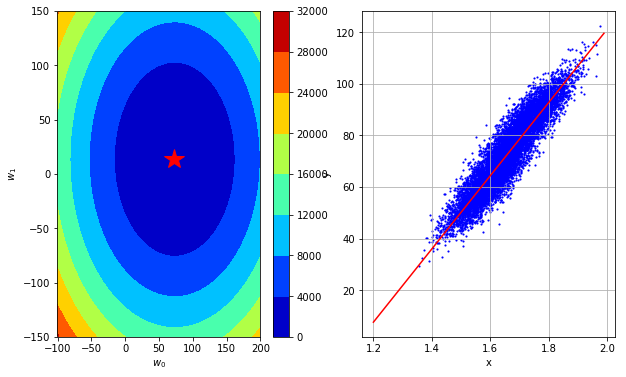

In [11]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [12]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""

    # number of samples
    N = len(y)
    
    # compute the vector of the errors
    e = y-tx.dot(w)
    
    # compute the gradient
    grad = -(1/N)*tx.T.dot(e)
    
    return grad    
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [13]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    
    # define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    # optimization loop
    for n_iter in range(max_iters):
        
        # compute new parameters
        w = w - gamma*compute_gradient(y, tx, w)
        
        # get new loss
        loss = compute_mse(y, tx, w)        
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
    print("Gradient Descent({bi}/{ti}): loss MSE={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    return losses, ws
    raise NotImplementedError

Test your gradient descent function through gradient descent demo shown below:

In [14]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(49/49): loss MSE=15.385887868829402, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent: execution time=0.016 seconds


<function __main__.plot_figure>

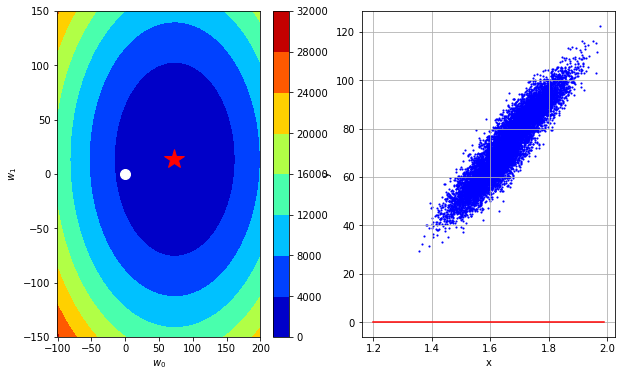

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [16]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""

    # number of samples in the batch tx
    B = len(y)
    
    # compute the vector of all the errors
    e = y-tx.dot(w) 

    # compute the stochastic gradient
    stoch_grad = -(1/B)*tx.T.dot(e)
    
    return stoch_grad

    raise NotImplementedError

In [17]:
def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    # optimization loop
    for n_iter in range(max_iters):
                
        # pick randomly 'batch_size' samples
        batches = batch_iter(y, tx, batch_size, num_batches=1, shuffle=True)
        
        for samples in batches:

            # read samples
            y = samples[0]
            tx = samples[1]
        
            # compute new parameters
            w = ws[-1] - gamma*compute_stoch_gradient(y, tx, ws[-1])
            
            # get new loss
            loss = compute_mse(y, tx, ws[-1])        
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
    print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

    raise NotImplementedError

In [18]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 50

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(49/49): loss=13.622350002129018, w0=72.54474414389051, w1=12.747620035384816
SGD: execution time=0.000 seconds


<function __main__.plot_figure>

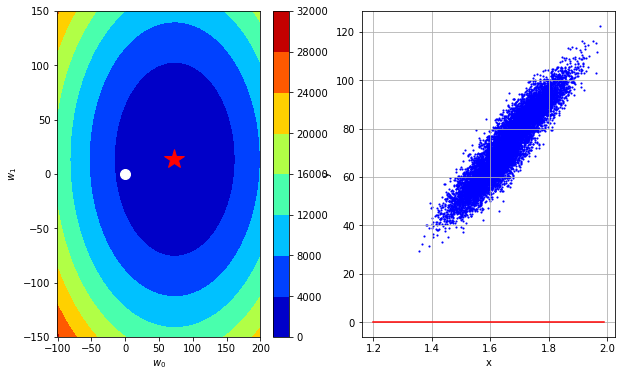

In [19]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Gradient Descent(49/49): loss=14.000413092280985, w0=72.41072905856026, w1=15.79377665530932
SGD: execution time=0.000 seconds


<function __main__.plot_figure>

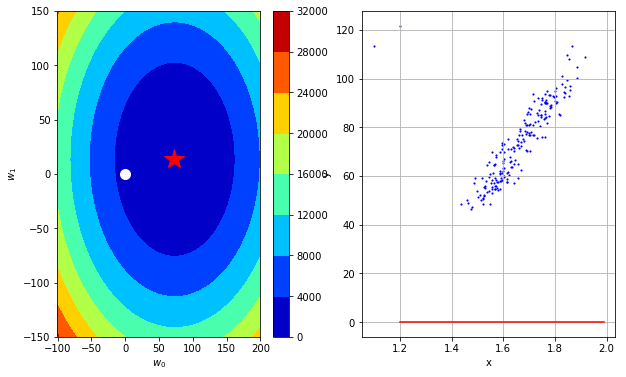

In [20]:
# load data with subsample and outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 50

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

In [21]:
from costs import*

In [22]:
def compute_subgradient_mae(y, tx, w):

    # number of samples
    N  = len(y)
    
    # compute the vector of errors
    e = y-tx.dot(w)
    
    # find positive errors
    subgrad_mae = (1/N)*(-tx.T).dot(e/abs(e))

    return subgrad_mae
    raise NotImplementedError

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [23]:
def subgradient_mae_descent(y, tx, initial_w, max_iters, gamma):

    """Subgradient descent algorithm when loss function is MAE."""
    
    # define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    # optimization loop
    for n_iter in range(max_iters):
        
        # compute new parameters
        w = w - gamma*compute_subgradient_mae(y, tx, w)
        
        # get new loss
        loss = compute_mae(y, tx, w)        
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
    print("Subgradient Descent MAE({bi}/{ti}): loss MAE={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    return losses, ws
    raise NotImplementedError

Subgradient Descent MAE(14/14): loss MAE=5.312444194976764, w0=72.55445544554455, w1=15.942229829042994
Subgradient descent MAE: execution time=0.000 seconds


<function __main__.plot_figure>

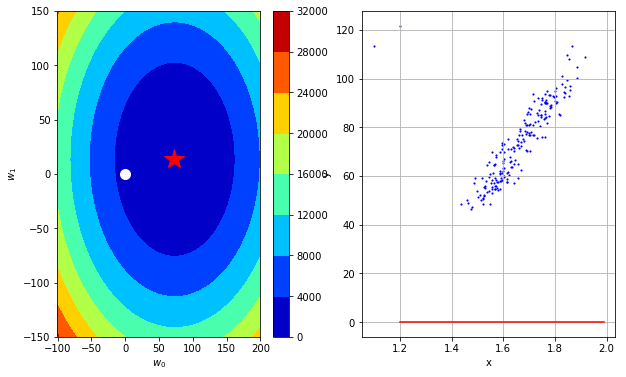

In [24]:
# Define the parameters of the algorithm.
max_iters = 15
gamma = 8

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = subgradient_mae_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Subgradient descent MAE: execution time={t:.3f} seconds".format(t=exection_time))

# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

In [25]:
def stochastic_subgradient_mae_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    # optimization loop
    for n_iter in range(max_iters):
                
        # pick randomly 'batch_size' samples
        batches = batch_iter(y, tx, batch_size, num_batches=1, shuffle=True)
        
        for samples in batches:

            # read samples
            y = samples[0]
            tx = samples[1]
        
            # compute new parameters
            w = ws[-1] - gamma*compute_subgradient_mae(y, tx, ws[-1])
            
            # get new loss
            loss = compute_mae(y, tx, ws[-1])        
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
    print("Stochastic Subgradient Descent MAE({bi}/{ti}): loss MAE={l}, w0={w0}, w1={w1}".format(bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

    raise NotImplementedError

In [26]:
# Define the parameters of the algorithm.
max_iters = 15
gamma = 8
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_subgradient_mae_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

Stochastic Subgradient Descent MAE(14/14): loss MAE=2.710142931545936, w0=75.19999999999999, w1=16.101734690971583
SGD: execution time=0.000 seconds


<function __main__.plot_figure>

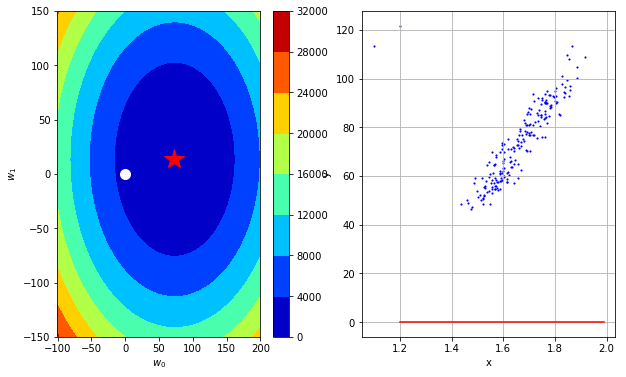

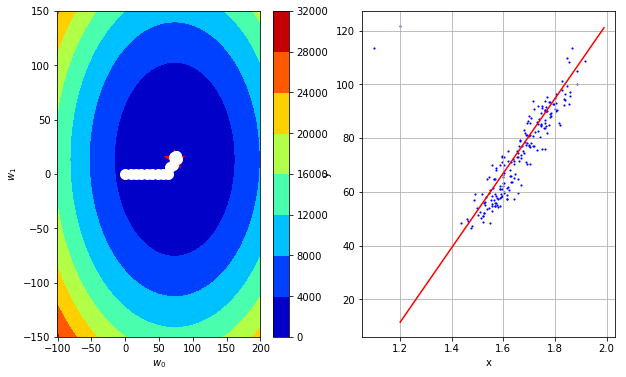

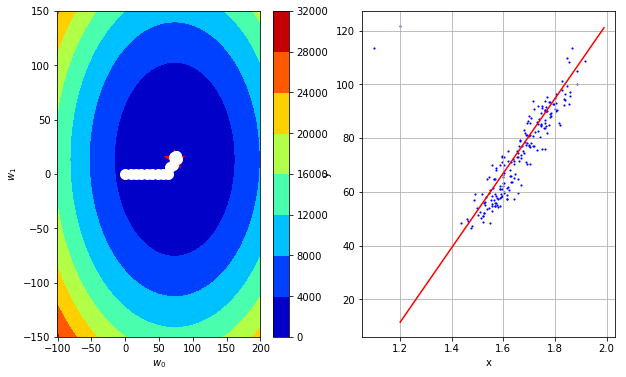

In [27]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    
interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))